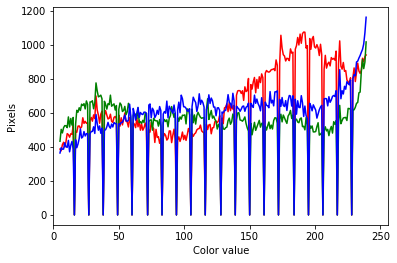

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import cv2
#import matplotlib as mpl
import numpy as np
from mpl_toolkits import mplot3d

from skimage import (
    color, feature, filters, io, measure, morphology, segmentation, util, viewer
)

img = io.imread('Images\Extrusion A.jpg')

#image has scale, need to remove
#shape is (440, 439, 3), why is it missing a row
#use np indexing to grid the image, also try random sampling


# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        #change range from 0,255 to 5,245 to get rid of markings
        img[:, :, channel_id], bins=256, range=(5, 240)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

#why peaks? are the colors continuous or defined?

In [ ]:
#alternative histogram
import cv2

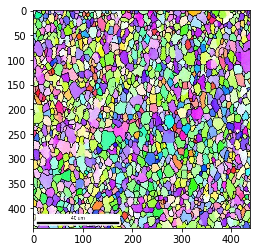

In [47]:
imgplot = plt.imshow(img)
r=img[:, :, 0]
g=img[:, :, 1]
b=img[:, :, 2]


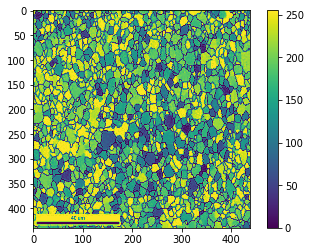

In [12]:
imgplot = plt.imshow(r)
plt.colorbar()

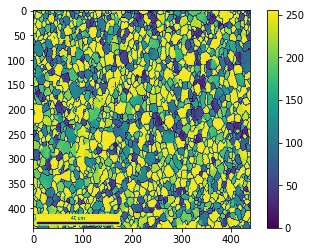

In [13]:
imgplot = plt.imshow(g)
plt.colorbar()

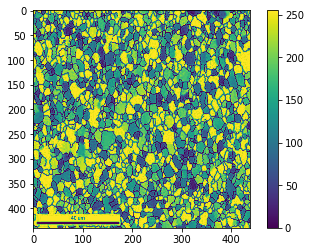

In [14]:
imgplot = plt.imshow(b)
plt.colorbar()

In [41]:
h1=np.histogram(img, bins=2)


In [18]:
#from skimage import data, exposure
#h2=exposure.histogram(img, nbins=2)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\exposure\exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


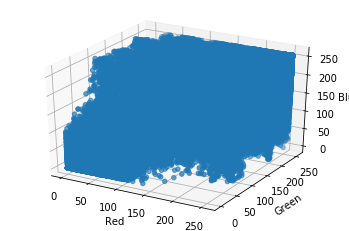

In [86]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = b
xdata = r
ydata = g
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

ax.scatter3D(xdata, ydata, zdata);
#add color later
#notice density of white and black corners 

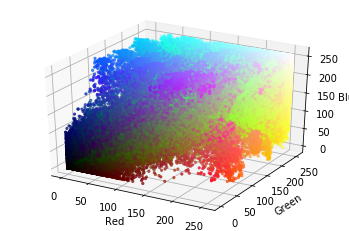

In [66]:
#remove pure white & black pixels, i.e. scale and borders
#https://realpython.com/python-opencv-color-spaces/
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [122]:
#color histogram
#bar color & value is average of points
#slices is number of lines slicing each axis evenly
#slices=1
#cube divided by number of minicubes, i.e. number of bins
#numbins=1.0/((1.0/(slices+1)**3))


#Find the average color of the image 
#unpack the array into an iterable list
rbin=[]
for x in range(0, 440):
    for y in range(0, 439):
        if r[x,y] < (255):
            rbin.append(r[x,y])
       # else:
       #    rbin.append(0)
#this destroys information, but only average is neccessary
rbinavg=sum(rbin)/len(rbin)
print(rbinavg)

#green average
gbin=[]
for x in range(0, 440):
    for y in range(0, 439):
        if g[x,y] < (255):
            gbin.append(r[x,y])
gbinavg=sum(gbin)/len(gbin)
print(gbinavg)

#blue average
bbin=[]
for x in range(0, 440):
    for y in range(0, 439):
        if b[x,y] < (255):
            bbin.append(r[x,y])
bbinavg=sum(bbin)/len(bbin)
print(bbinavg)

#average is gray, make sure to use histogram to cut out white & black

144.1899907623757
145.63278738972852
145.26935343091176


In [5]:
#https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

#read image
img = cv2.imread('Images\Extrusion A.jpg')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

In [19]:
#https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036

import cv2
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = 'Images\Extrusion A.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

[[109 100 107]
 [219 224 218]
 [170 233 122]
 [176 112 225]
 [ 32  33  32]]


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class DominantColors:

    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()

In [9]:
img = 'Images\Extrusion A.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

AttributeError: 'str' object has no attribute 'reshape'

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    FLAT_IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
    
    def dominantColors(self):

        img = self.IMAGE
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.FLAT_IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #getting the colors as per dominance order
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        return self.COLORS.astype(int)
                
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.FLAT_IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    def colorPixels(self):
        
        shape = self.IMAGE.shape
        
        img = np.zeros((shape[0] * shape[1], 3))
        labels = self.LABELS

        for i,color in enumerate(self.COLORS):
            
            indices = np.where(labels==i)[0]
            
            for index in indices:
                img[index] = color
        
        img = img.reshape((shape[0], shape[1], 3)).astype(int)
        
        #display img
        plt.figure()
        plt.axis("off")
        plt.imshow(img)
        plt.show()

In [10]:
import cv2

#open image
img = 'Images\Extrusion A.jpg'
img = cv2.imread(img)

#convert to RGB from BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#no. of clusters
clusters = 5

#initialize using constructor
dc = DominantColors(img, clusters)

#print dominant colors
colors = dc.dominantColors()
print(colors)

#display clustered points
dc.plotClusters()

#display dominance order
dc.plotHistogram()


[[ 32  33  32]
 [219 224 218]
 [170 233 122]
 [176 112 225]
 [109 100 107]]


KeyboardInterrupt: 

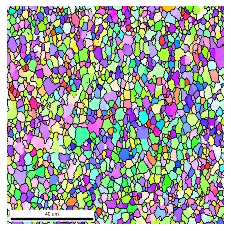

In [56]:
#https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
# construct the argument parser and parse the arguments
"""
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = "Path to the image")
ap.add_argument("-c", "--clusters", required = True, type = int,
	help = "# of clusters")
args = vars(ap.parse_args())
"""
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread('Images\Extrusion A.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [57]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [59]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 5) #args["clusters"]
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist

In [61]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        #print size and average of each cluster
        print(percent)
        print(color)
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

0.19378235659556844
[176.54548124 112.56558537 225.7505006 ]
0.12937461172085318
[109.15174677 100.17299612 107.63980151]
0.2590028991509629
[219.55728272 224.36283716 218.5848951 ]
0.1949989645889418
[32.681064   33.45055616 32.60290955]
0.22284116794367365
[170.26753029 233.81324278 122.0802149 ]


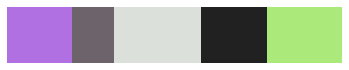

In [62]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
#program to read and clean file, randomly sample lines to get random sample

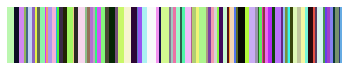

In [55]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()
#100 clusters